# cqt 테스트

In [1]:
# Code source: Brian McFee
# License: ISC

##################
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

import librosa

import librosa.display

In [2]:
y, sr = librosa.load(librosa.ex('trumpet'), )
print(sr)
print(y.shape)
print(type(y))
# And compute the spectrogram magnitude and phase
# S_full, phase = librosa.magphase(librosa.stft(y))

# Play back a 5-second excerpt without vocals
# Audio(data=y[5*sr:10*sr], rate=sr) # 5~10초
Audio(data=y, rate=sr)

22050
(117601,)
<class 'numpy.ndarray'>


In [3]:
# y_5 = y[5*sr:10*sr]
# print(y_slice5)

In [62]:
octave = 8
freq_n = 3
# div_db = -30
hop_len = 1024

C = np.abs(librosa.cqt(y, sr=sr,
                      n_bins=12* octave * freq_n, bins_per_octave=12 * freq_n, # 더 높은 주파수 분해능
                       hop_length = hop_len
                      ))

C_db = librosa.amplitude_to_db(C, ref=np.max)
# C_img = np.where(C_db<div_db)
print(C_db.size)
# print(C_img[0].shape)
# print(C_img[1].shape)

33120


In [64]:
C_f = np.where((C_db+40)<0,0,C_db)

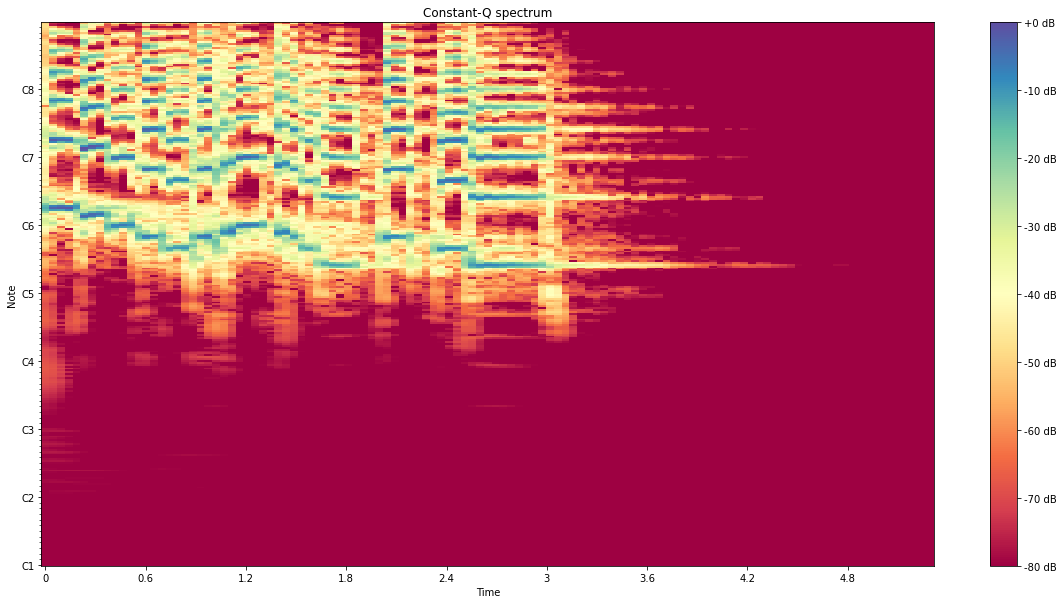

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
img = librosa.display.specshow(C_db,
                               sr=22050, # 1초당 25frame
                               x_axis='time', y_axis='cqt_note', ax=ax,
                               bins_per_octave=12*freq_n,
                               hop_length = hop_len,
                               cmap='Spectral'
                              )
ax.set_title('Constant-Q spectrum')
fig.colorbar(img, ax=ax,
              format="%+2.0f dB"
            )
plt.show()

In [6]:
C_db.T[50]

array([-80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -79.76862 , -79.5677  , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -79.992195, -78.77688 , -79.2249  , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -78.89154 , -79.11269 , -80.      ,
       -80.      , -76.29625 , -71.61724 , -67.0418  , -66.844444,
       -69.64796 , -68.839264, -71.25746 , -65.22682 , -63.655045,
       -60.353874, -58.331707, -56.757248, -56.52808 , -57.771

# 데이터 전처리

In [7]:
cqt_pre = np.load('./cqt.npz')
sr=44100
cqt_inst = cqt_pre['spec']
cqt_inst

array([[[4.26330045e-03, 4.29108646e-03, 4.28294903e-03, ...,
         2.57500378e-05, 2.40013451e-05, 2.33735009e-05],
        [3.40397656e-03, 3.36480350e-03, 3.29754641e-03, ...,
         1.88389131e-05, 1.70442308e-05, 1.82790754e-05],
        [3.53455311e-03, 3.60217155e-03, 3.64290387e-03, ...,
         1.92582847e-05, 1.85813515e-05, 1.86864727e-05],
        ...,
        [5.60744993e-05, 2.84751994e-03, 3.31443059e-03, ...,
         2.98952432e-06, 1.26267730e-06, 1.23505311e-06],
        [5.47529926e-05, 3.37503804e-03, 3.55780125e-03, ...,
         1.91908862e-06, 4.05361834e-06, 3.50292498e-06],
        [4.05467617e-05, 2.15049251e-03, 2.01886334e-03, ...,
         7.13340171e-07, 5.09812890e-06, 8.38353117e-06]],

       [[4.26110253e-03, 4.28976631e-03, 4.28257510e-03, ...,
         6.48469140e-05, 6.14241508e-05, 5.85528396e-05],
        [3.40598472e-03, 3.36715672e-03, 3.30026681e-03, ...,
         7.11716202e-05, 6.68077846e-05, 6.49864014e-05],
        [3.53525789e-03, 

In [8]:
inst_db = librosa.amplitude_to_db(cqt_inst, ref=np.max)

In [9]:
train=[]
for i in range(20488):
    train.append(np.array(inst_db[i].T))
train = np.array(train)
print(type(train), train.shape)

<class 'numpy.ndarray'> (20488, 87, 168)


In [10]:
train = train.reshape(-1,168)
print(train.shape)
train[:10]

(1782456, 168)


array([[-69.91475 , -71.869934, -71.54298 , ..., -80.      , -80.      ,
        -80.      ],
       [-69.85832 , -71.970474, -71.37838 , ..., -73.42033 , -71.94409 ,
        -75.85891 ],
       [-69.87481 , -72.14585 , -71.280716, ..., -72.10149 , -71.48603 ,
        -76.407524],
       ...,
       [-71.1243  , -74.696434, -72.26779 , ..., -80.      , -76.68535 ,
        -80.      ],
       [-71.598   , -75.61268 , -72.75817 , ..., -80.      , -80.      ,
        -80.      ],
       [-72.14816 , -76.663734, -73.309944, ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [11]:
target_pre = cqt_pre['instr']
print(target_pre.shape)

(20488, 2)


In [12]:
target = []
for i in range(20488):
    temp = []
    for j in range(87):
        temp.append(target_pre[i])
    target.append(temp)
        
target = np.array(target)
target.shape

(20488, 87, 2)

In [13]:
target = target.reshape(-1,2)
print(target.shape)
target[:10]

(1782456, 2)


array([[ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38],
       [ 0, 38]], dtype=int16)

In [14]:
inst_target = target[:,0]
note_target = target[:,1].astype(np.float64)
print(inst_target.shape, note_target.shape)

(1782456,) (1782456,)


In [15]:
note_target

array([38., 38., 38., ...,  0.,  0.,  0.])

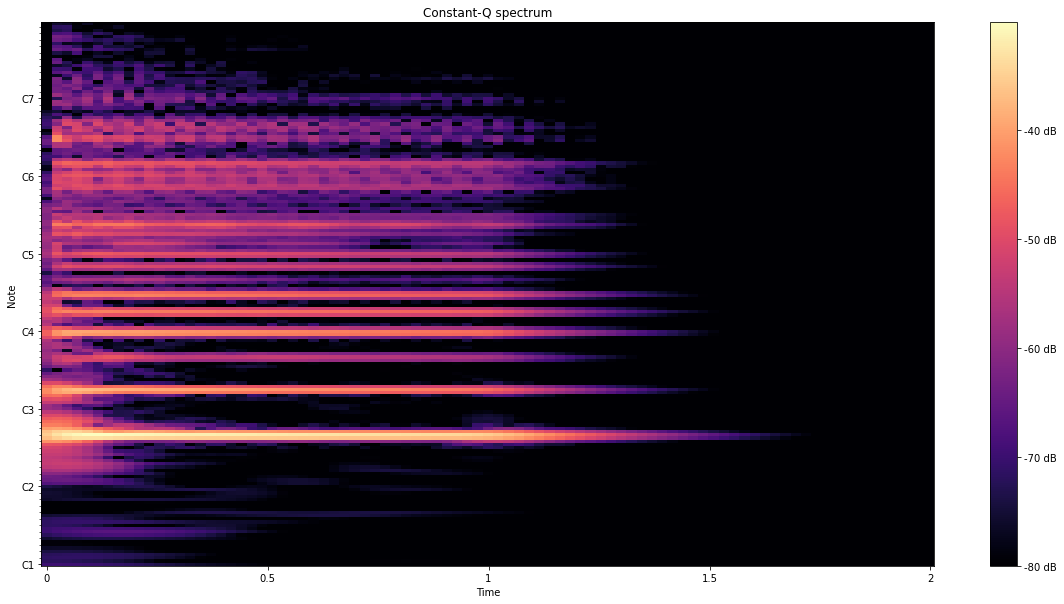

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
img = librosa.display.specshow(inst_db[0], sr=sr,
                               x_axis='time', y_axis='cqt_note', ax=ax,
                               bins_per_octave=24,
                               hop_length = 1024
                              )
ax.set_title('Constant-Q spectrum')
fig.colorbar(img, ax=ax,
              format="%+2.0f dB"
            )
plt.show()

In [17]:
len(np.unique(note_target))

51

In [18]:
import sys

import numpy as np
from PyQt5 import QtWidgets
import pyqtgraph as pg

In [24]:
#Sample data code omitted

#GUI control object
app = QtWidgets.QApplication(sys.argv)
#Window creation
window = pg.GraphicsLayoutWidget()
#Image object creation&Set image
image = pg.ImageItem()
image.setImage(train[:,:])
#Create a box to store images&Set image object
view_box = pg.ViewBox()
view_box.addItem(image)
#Plot object creation&View created above_set box
plot = pg.PlotItem(viewBox=view_box)
#Add plot to window
window.addItem(plot)
#Window display
window.show()
#The end of the program
sys.exit(app.exec())

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

SystemExit: 0

C:\Users\Mu-jun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [23]:
taget11=(inst_db+40)/40
taget11 = taget11.reshape(-1,168,87,1)
taget11.shape

(20488, 168, 87, 1)

# 창 띄우기

In [68]:
import cv2

In [71]:
img = (train +80)/80*255

In [76]:
cv2.namedWindow('image', cv2.WINDOW_GUI_EXPANDED)
cv2.imshow('image', img.T)

cv2.waitKey()
cv2.destroyAllWindows()

# DNN 모델 만들기

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *